<a href="https://colab.research.google.com/github/iracheta827/InteligenciaArtificial/blob/main/PIA_IA_1raRN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Kevin Woge Rivera 1834672
###Benito Briones Bautista 1838682
###Jose Emanuel Martinez Rodriguez 1851368
###Gregorio Missael Iracheta Arias 1851846

In [ ]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 50
optimizer = Adam(learning_rate=0.0001)
validation_split = 0.2
verbosity = 1

In [ ]:
# Load CIFAR-10 data
(input_train, target_train), (input_test, target_test) = cifar100.load_data("coarse")

169017344/169001437 [==============================] - 2s 0us/step


[11]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [195 205 193]
  [212 224 204]
  [182 194 167]]

 [[255 255 255]
  [254 254 254]
  [254 254 254]
  ...
  [170 176 150]
  [161 168 130]
  [146 154 113]]

 [[255 255 255]
  [254 254 254]
  [255 255 255]
  ...
  [189 199 169]
  [166 178 130]
  [121 133  87]]

 ...

 [[148 185  79]
  [142 182  57]
  [140 179  60]
  ...
  [ 30  17   1]
  [ 65  62  15]
  [ 76  77  20]]

 [[122 157  66]
  [120 155  58]
  [126 160  71]
  ...
  [ 22  16   3]
  [ 97 112  56]
  [141 161  87]]

 [[ 87 122  41]
  [ 88 122  39]
  [101 134  56]
  ...
  [ 34  36  10]
  [105 133  59]
  [138 173  79]]]


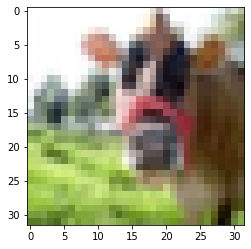

In [ ]:
plt.imshow(input_train[0])
print(target_train[0])
print(input_train[0])

In [ ]:
# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

In [ ]:
# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

In [ ]:
# Create the model
model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [ ]:
# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit data to model
history = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

Epoch 1/50
800/800 [==============================] - 42s 16ms/step - loss: 2.8408 - accuracy: 0.1438 - val_loss: 2.5830 - val_accuracy: 0.2085
Epoch 2/50
800/800 [==============================] - 12s 16ms/step - loss: 2.4518 - accuracy: 0.2476 - val_loss: 2.3391 - val_accuracy: 0.2798
Epoch 3/50
800/800 [==============================] - 12s 16ms/step - loss: 2.2723 - accuracy: 0.3003 - val_loss: 2.2604 - val_accuracy: 0.2945
Epoch 4/50
800/800 [==============================] - 12s 16ms/step - loss: 2.1595 - accuracy: 0.3341 - val_loss: 2.1324 - val_accuracy: 0.3386
Epoch 5/50
800/800 [==============================] - 12s 15ms/step - loss: 2.0757 - accuracy: 0.3584 - val_loss: 2.0997 - val_accuracy: 0.3541
Epoch 6/50
800/800 [==============================] - 13s 16ms/step - loss: 2.0027 - accuracy: 0.3833 - val_loss: 2.0010 - val_accuracy: 0.3791
Epoch 7/50
800/800 [==============================] - 12s 15ms/step - loss: 1.9383 - accuracy: 0.4011 - val_loss: 1.9597 - val_accuracy:

Test loss: 2.4387195110321045 / Test accuracy: 0.48030000925064087


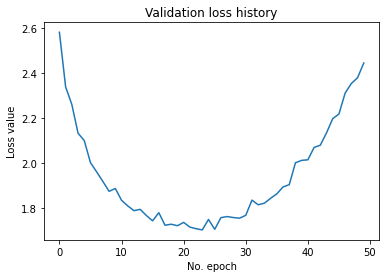

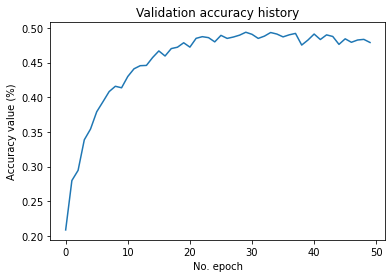

In [ ]:
# Generate generalization metricsZ
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

<Figure size 432x288 with 0 Axes>

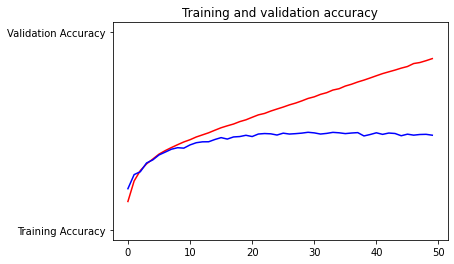

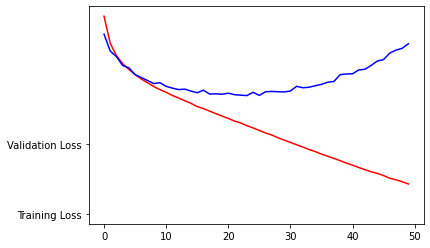

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
 
epochs=range(len(acc)) # Get number of epochs
 
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()
 
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()